## Codio Activity 7.5: Calculating Multiple Loss Functions

**Expected Time = 60 minutes**

**Total Points = 20**

A third loss function mentioned is the Huber loss function.  This is notable for its resistance to extreme values and is defined as a piecewise function:


$${\displaystyle L_{\delta }(y,f(x))={\begin{cases}{\frac {1}{2}}(y-f(x))^{2}&{\textrm {for}}|y-f(x)|\leq \delta ,\\\delta \,(|y-f(x)|-{\frac {1}{2}}\delta ),&{\textrm {otherwise.}}\end{cases}}}$$

In this activity, you will compute and compare the results of minimizing the mean squared error, mean absolute error, and huber loss functions.  


## Index:

- [Problem 1](#Problem-1)
- [Problem 2](#Problem-2)
- [Problem 3](#Problem-3)

In [16]:
import seaborn as sns
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import plotly.express as px
import plotly.graph_objects as go
from scipy.optimize import minimize
from sklearn.metrics import mean_squared_error

### The tips data

For this exercise, the tips dataset from the lectures will be used, and you are to predict the tip amount given the total bill.  

In [4]:
tips = sns.load_dataset('tips')

In [5]:
tips.head()

,total_bill,tip,sex,smoker,day,time,size
0,16.99,1.01,Female,No,Sun,Dinner,2
1,10.34,1.66,Male,No,Sun,Dinner,3
2,21.01,3.50,Male,No,Sun,Dinner,3
3,23.68,3.31,Male,No,Sun,Dinner,2
4,24.59,3.61,Female,No,Sun,Dinner,4


In [6]:
X = tips['total_bill']
y = tips['tip']

In [7]:
    yhub = abs(y - X * 8)
    sum(yhub>1.5)
    sum(yhub[yhub>1.5])

37890.580000000016

[Back to top](#Index:) 

## Problem 1

### Create a Huber Loss function

**10 Points**

Using the formula repeated below for the Huber loss, complete the function that returns the sum of the Huber Loss equation.

$${\displaystyle L_{\delta }(y,f(x))={\begin{cases}{\frac {1}{2}}(y-f(x))^{2}&{\textrm {for}}|y-f(x)|\leq \delta ,\\\delta \,(|y-f(x)|-{\frac {1}{2}}\delta ),&{\textrm {otherwise.}}\end{cases}}}$$

Your function will take in both a value for $\theta$ and for $\delta$.  Set the value of $\delta = 1.5$ by default.

In [11]:
#GRADED

def huber_loss(theta, delta):
    """
    This function accepts a value for theta
    and returns the sum of the huber loss.
    
    Arguments
    ---------
    theta: float
           Values to use for parameter
           of regression model.
           
    delta: float
           Value for delta in Huber Loss
            
    Returns
    -------
    huber: np.float
         Sum of huber loss
    """

# YOUR CODE HERE
#raise NotImplementedError()
def huber_loss(theta, delta = 1.5):
    yhub = abs(y - X * theta)
    #return sum( (y - yhub[yhub <= delta]) **2) / 2 + delta * sum( (abs(y - yhub[yhub > delta]) - delta/2) )
    return sum (np.where(yhub <= delta, (y - yhub) **2 / 2, delta * abs(y - yhub) - delta / 2 ))


huber_loss(8)

55555.49999999997

[Back to top](#Index:) 

## Problem 2

### Minimizing Huber Loss

**10 Points**

Use the `minimize` function imported from `scipy.optimize` to determine the optimal value for $\theta$ based on the Huber Loss with $\delta = 1.5$.  Assign your results as type `np.float` to `theta_huber` below with `x0 = .5`.  

In [13]:
### GRADED

theta_huber = ''

# YOUR CODE HERE
#raise NotImplementedError()
theta_huber = minimize(huber_loss, x0 = .5).x[0]

# Answer check
print(type(theta_huber))
print(theta_huber)

<class 'numpy.float64'>
0.3001705464139867


[Back to top](#Index:) 

## Problem 3

### Plotting and Comparing Models

**0 Points**

Now, complete the function below that will generate a `matplotlib` scatterplot of your data `X` vs. `y` and include plots of the models resulting from `mse`, `mae`, and `huber` loss functions.  This problem is not graded.

In [21]:
theta = 8
mse = mean_squared_error(y, X * theta)
huber = huber_loss(theta)
mae = ''

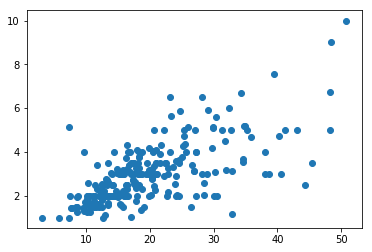

In [23]:
plt.scatter(X, y)

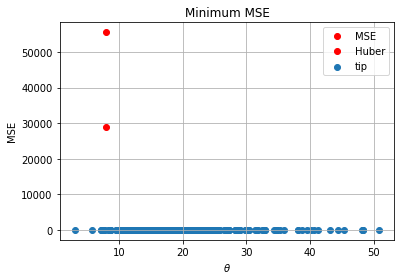

In [22]:
plt.scatter(X, y)
plt.plot(theta, mse, 'ro', label = 'MSE')
plt.plot(theta, huber, 'ro', label = 'Huber')
plt.legend()
plt.title('Minimum MSE')
plt.xlabel(r'$\theta$')
plt.ylabel('MSE')
plt.grid()